# Compare Result Equity 

## Import Library

In [241]:
import sys
sys.path.append('../../')

In [242]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt
from util.load_data import load_data

## Load result strategy

In [243]:
strategy = {}

### Data XAUUSD

In [244]:
XAUUSD = load_data()

In [245]:
XAUUSD['D1_IS'] = XAUUSD['D1'].loc['2007': '2019'].copy()
XAUUSD['H4_IS'] = XAUUSD['H4'].loc['2007': '2019'].copy()
XAUUSD['H1_IS'] = XAUUSD['H1'].loc['2007': '2019'].copy()
XAUUSD['M30_IS'] = XAUUSD['M30'].loc['2007': '2019'].copy()

In [246]:
XAUUSD['D1_OOS'] = XAUUSD['D1'].loc['2020': '2023'].copy()
XAUUSD['H4_OOS'] = XAUUSD['H4'].loc['2020': '2023'].copy()
XAUUSD['H1_OOS'] = XAUUSD['H1'].loc['2020': '2023'].copy()
XAUUSD['M30_OOS'] = XAUUSD['M30'].loc['2020': '2023'].copy()

### Buy and Hold

In [247]:
benchmark = {}

In [248]:
benchmark['D1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark['H4'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benchmark['H1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benchmark['M30'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

In [249]:
benchmark['D1_IS'] = benchmark['D1'].loc['2007':'2019'].copy()
benchmark['H4_IS'] = benchmark['H4'].loc['2007':'2019'].copy()
benchmark['H1_IS'] = benchmark['H1'].loc['2007':'2019'].copy()
benchmark['M30_IS'] = benchmark['M30'].loc['2007':'2019'].copy()

In [250]:
benchmark['D1_OOS'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1_OOS.csv', index_col='Time', parse_dates=True)
benchmark['H4_OOS'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4_OOS.csv', index_col='Time', parse_dates=True)
benchmark['H1_OOS'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1_OOS.csv', index_col='Time', parse_dates=True)
benchmark['M30_OOS'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30_OOS.csv', index_col='Time', parse_dates=True)

In [251]:
benchmark['D1_OOS']

,Equity,DrawdownPct,DrawdownDuration,returns
Time,,,,
2020-01-01,10000.000,0.000000,NaN,0.000000
2020-01-02,10000.000,0.000000,NaN,0.000000
2020-01-03,10022.787,0.000000,NaN,0.002279
2020-01-05,10040.417,0.000000,NaN,0.001759
2020-01-06,10034.950,0.000544,NaN,-0.000544
...,...,...,...,...
2023-03-06,10317.527,0.021149,NaN,-0.000581
2023-03-07,10285.137,0.024222,NaN,-0.003139
2023-03-08,10286.447,0.024098,NaN,0.000127


In [252]:
strategy['Buy and Hold'] = benchmark

###  Linear Regression

In [253]:
Linear_Regression = {}
folder = 'Linear Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [254]:
Linear_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [255]:
Linear_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [256]:
strategy['Linear Regression'] = Linear_Regression

###  Logistic Regression

In [257]:
Logistic_Regression = {}
folder = 'Logistic Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [258]:
Logistic_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [259]:
Logistic_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [260]:
strategy['Logistic Regression'] = Logistic_Regression

###  Mutiple Linear Regression

In [261]:
Mutiple_Linear_Regression = {}
folder = 'Mutiple_Linear_Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [262]:
Mutiple_Linear_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [263]:
Mutiple_Linear_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [264]:
strategy['Mutiple Linear Regression'] = Mutiple_Linear_Regression

###  Random Forest Classifier

In [265]:
Random_Forest_Classifier = {}
folder = 'Random Forest Classifier'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [266]:
Random_Forest_Classifier['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [267]:
Random_Forest_Classifier['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [268]:
strategy['Random Forest Classifier'] = Random_Forest_Classifier

###  Support Vector Classifier

In [269]:
Support_Vector_Classifier = {}
folder = 'Support Vector Classifier'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [270]:
Support_Vector_Classifier['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [271]:
Support_Vector_Classifier['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [272]:
strategy['Support Vector Classifier'] = Support_Vector_Classifier

###  Support Vector Regression

In [273]:
Support_Vector_Regression = {}
folder = 'Support Vector Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [274]:
Support_Vector_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [275]:
Support_Vector_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [276]:
strategy['Support Vector Regression'] = Support_Vector_Regression

## Shown Result

### TF D1

In [277]:
TF = 'D1'

#### IS

In [278]:
TF_IS = f'{TF}_IS'

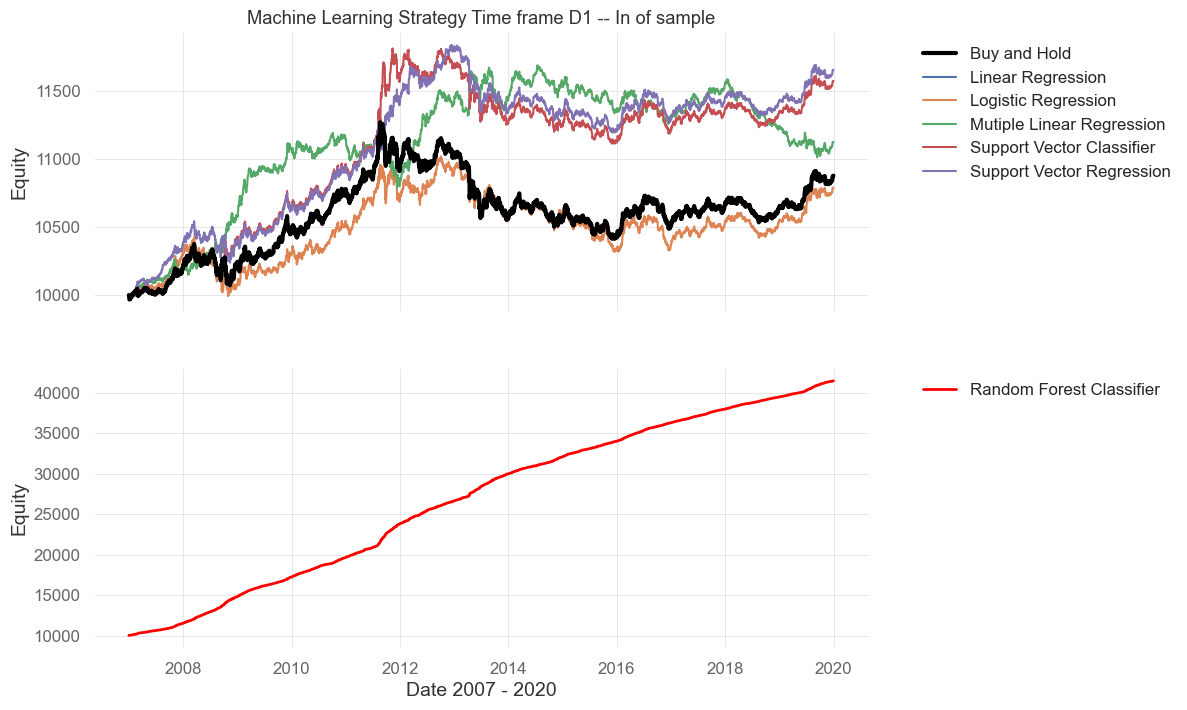

In [279]:


x = XAUUSD[TF_IS].index  # Using the index directly without calling it


# สร้าง subplots 2 แถว 1 คอลัมน์
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

with plt.style.context('seaborn-v0_8-whitegrid'):
    for i, data in enumerate(strategy):
        y = strategy[f'{data}'][TF_IS]['Equity']
        if data == 'Buy and Hold':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[0].plot(x, y, label=f'{data}',
                        color='black', linewidth=3, zorder=20)
        elif data == 'Random Forest Classifier':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[1].plot(x, y, label=f'{data}',
                        color='red', linewidth=2, zorder=20)
        else:
            # ใช้ axs[1] เพื่อพล็อตในกราฟที่สอง
            axs[0].plot(x, y, label=f'{data}')

    axs[0].set_title(
        f'Machine Learning Strategy Time frame {TF} -- In of sample')
    axs[1].set_xlabel('Date 2007 - 2020', fontsize=14)
    axs[0].set_ylabel('Equity', fontsize=14)
    axs[1].set_ylabel('Equity', fontsize=14)
    # ใช้ legend ในกราฟแรก
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # ใช้ legend ในกราฟที่สอง
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [280]:
TF_OOS = f'{TF}_OOS'

skip Buy and Hold


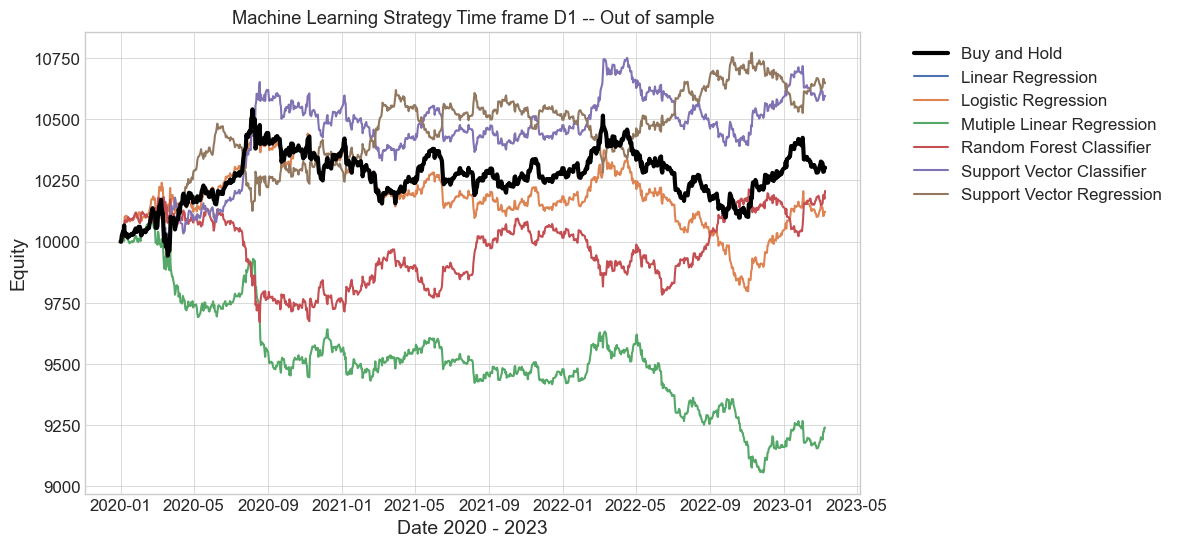

In [281]:
x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':
            print('skip Buy and Hold')
            plt.plot(x, y, label=f'{data}',
                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H4

In [282]:
TF = 'H4'

#### IS

In [283]:
TF_IS = f'{TF}_IS'

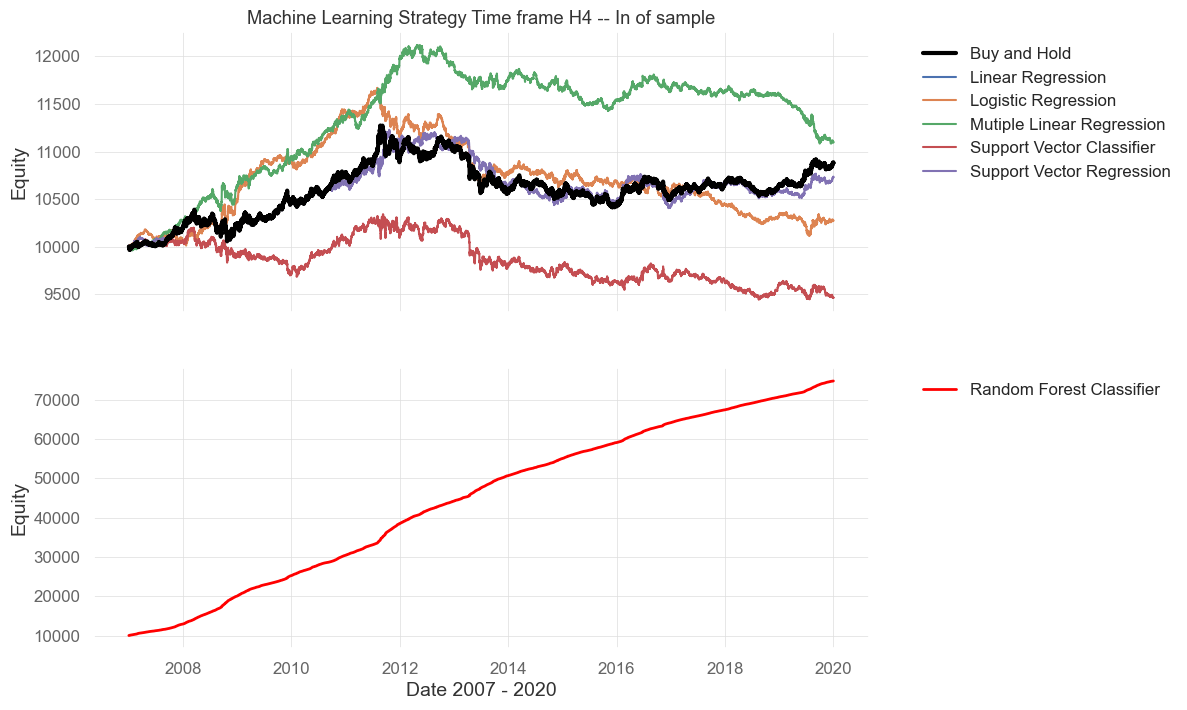

In [284]:


x = XAUUSD[TF_IS].index  # Using the index directly without calling it


# สร้าง subplots 2 แถว 1 คอลัมน์
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

with plt.style.context('seaborn-v0_8-whitegrid'):
    for i, data in enumerate(strategy):
        y = strategy[f'{data}'][TF_IS]['Equity']
        if data == 'Buy and Hold':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[0].plot(x, y, label=f'{data}',
                        color='black', linewidth=3, zorder=20)
        elif data == 'Random Forest Classifier':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[1].plot(x, y, label=f'{data}',
                        color='red', linewidth=2, zorder=20)
        else:
            # ใช้ axs[1] เพื่อพล็อตในกราฟที่สอง
            axs[0].plot(x, y, label=f'{data}')

    axs[0].set_title(
        f'Machine Learning Strategy Time frame {TF} -- In of sample')
    axs[1].set_xlabel('Date 2007 - 2020', fontsize=14)
    axs[0].set_ylabel('Equity', fontsize=14)
    axs[1].set_ylabel('Equity', fontsize=14)
    # ใช้ legend ในกราฟแรก
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # ใช้ legend ในกราฟที่สอง
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [285]:
TF_OOS = f'{TF}_OOS'

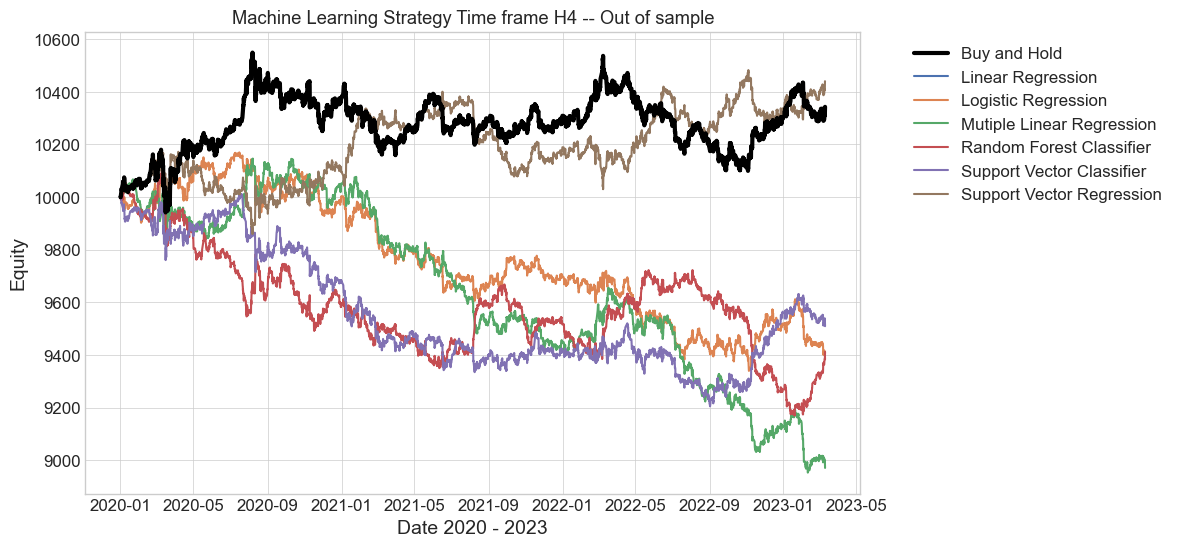

In [286]:
x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':

            plt.plot(x, y, label=f'{data}',
                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H1

In [287]:
TF = 'H1'

#### IS

In [288]:
TF_IS = f'{TF}_IS'

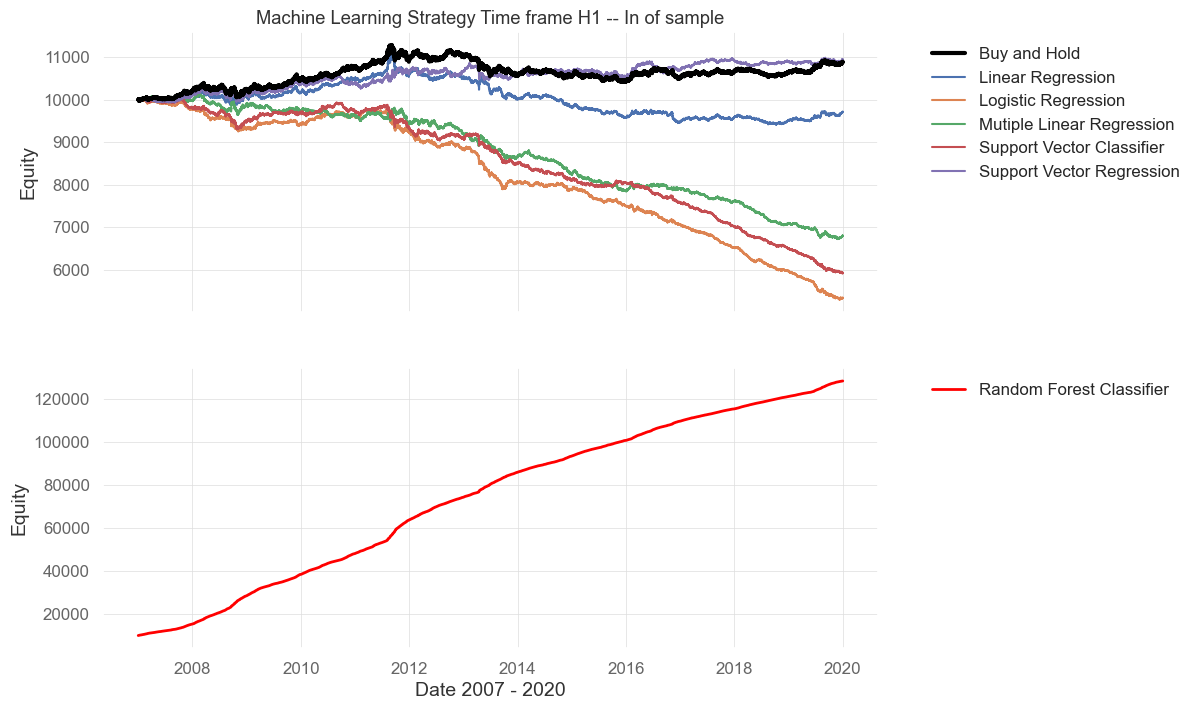

In [289]:


x = XAUUSD[TF_IS].index  # Using the index directly without calling it


# สร้าง subplots 2 แถว 1 คอลัมน์
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

with plt.style.context('seaborn-v0_8-whitegrid'):
    for i, data in enumerate(strategy):
        y = strategy[f'{data}'][TF_IS]['Equity']
        if data == 'Buy and Hold':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[0].plot(x, y, label=f'{data}',
                        color='black', linewidth=3, zorder=20)
        elif data == 'Random Forest Classifier':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[1].plot(x, y, label=f'{data}',
                        color='red', linewidth=2, zorder=20)
        else:
            # ใช้ axs[1] เพื่อพล็อตในกราฟที่สอง
            axs[0].plot(x, y, label=f'{data}')

    axs[0].set_title(
        f'Machine Learning Strategy Time frame {TF} -- In of sample')
    axs[1].set_xlabel('Date 2007 - 2020', fontsize=14)
    axs[0].set_ylabel('Equity', fontsize=14)
    axs[1].set_ylabel('Equity', fontsize=14)
    # ใช้ legend ในกราฟแรก
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # ใช้ legend ในกราฟที่สอง
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [290]:
TF_OOS = f'{TF}_OOS'

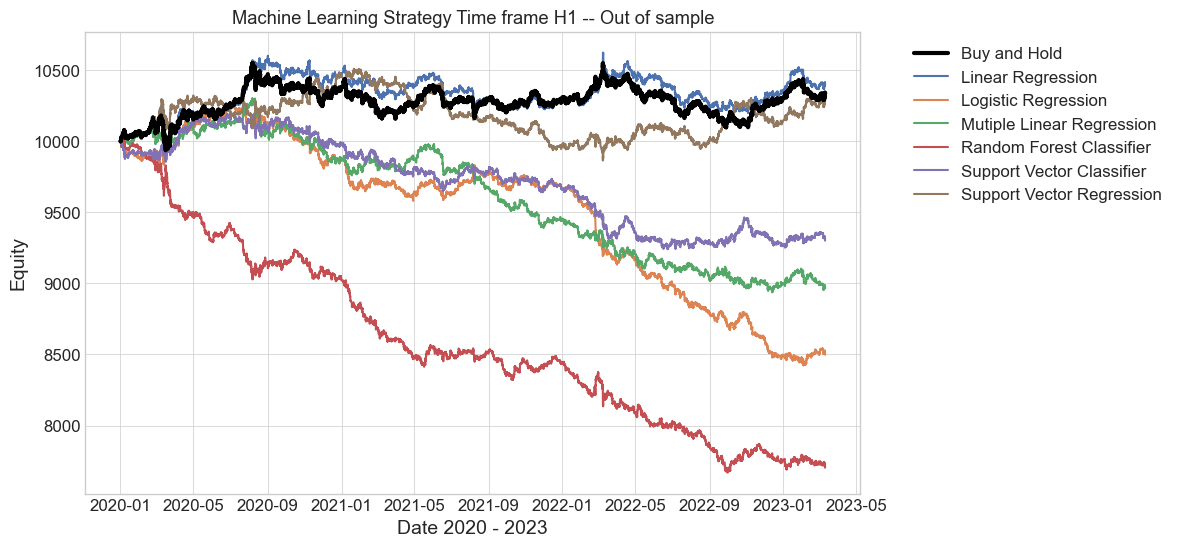

In [291]:

x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':

            plt.plot(x, y, label=f'{data}',
                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF M30

In [292]:
TF = 'M30'

#### IS

In [293]:
TF_IS = f'{TF}_IS'

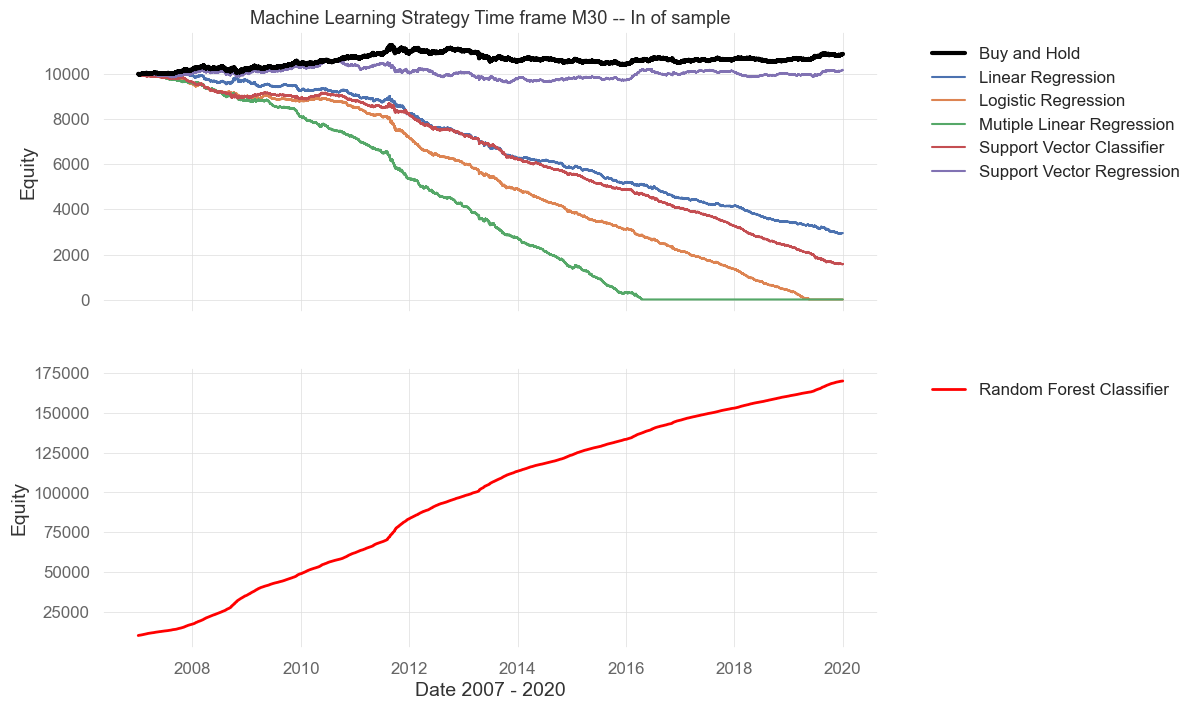

In [294]:


x = XAUUSD[TF_IS].index  # Using the index directly without calling it


# สร้าง subplots 2 แถว 1 คอลัมน์
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

with plt.style.context('seaborn-v0_8-whitegrid'):
    for i, data in enumerate(strategy):
        y = strategy[f'{data}'][TF_IS]['Equity']
        if data == 'Buy and Hold':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[0].plot(x, y, label=f'{data}',
                        color='black', linewidth=3, zorder=20)
        elif data == 'Random Forest Classifier':
            # ใช้ axs[0] เพื่อพล็อตในกราฟแรก
            axs[1].plot(x, y, label=f'{data}',
                        color='red', linewidth=2, zorder=20)
        else:
            # ใช้ axs[1] เพื่อพล็อตในกราฟที่สอง
            axs[0].plot(x, y, label=f'{data}')

    axs[0].set_title(
        f'Machine Learning Strategy Time frame {TF} -- In of sample')
    axs[1].set_xlabel('Date 2007 - 2020', fontsize=14)
    axs[0].set_ylabel('Equity', fontsize=14)
    axs[1].set_ylabel('Equity', fontsize=14)
    # ใช้ legend ในกราฟแรก
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # ใช้ legend ในกราฟที่สอง
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [295]:
TF_OOS = f'{TF}_OOS'

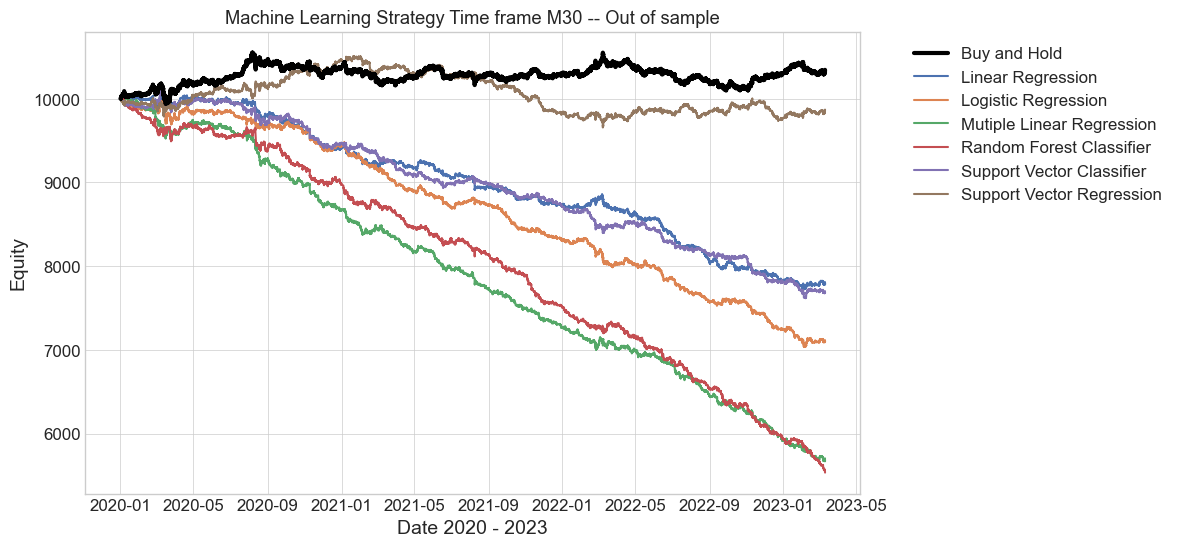

In [296]:


x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':

            plt.plot(x, y, label=f'{data}',
                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()